## Lesson 04
#### Урок 4. Система управления базами данных MongoDB в Python

Написать приложение, которое собирает основные новости с сайта на выбор news.mail.ru, lenta.ru, yandex-новости. Для парсинга использовать XPath. Структура данных должна содержать:

наименование новости;
ссылку на новость;
дата публикации.

Сложить собранные новости в БД

In [2]:
from pprint import pprint
from lxml import html
import requests
from pymongo import MongoClient

In [13]:
# парсим новости
url = "https://lenta.ru"

headers = {
    'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36',
}

responce = requests.get(url, headers=headers)

dom = html.fromstring(responce.text)


newslist = dom.xpath("//div[@class='topnews__column']/a[@class='card-mini _topnews']")

i=0
newsdict = {}
for elements in newslist:
    nname = elements.xpath("//div/span/text()")[i]
    nlink = url + elements.xpath("//a[@class='card-mini _topnews']/@href")[i]
    ntime = elements.xpath("//div/div/time/text()")[i]
    newsdict[i] = {'nname': nname, 'link' : nlink, 'time' : ntime}
    i += 1

for x in newsdict:
    print (x)
    for z in newsdict[x]:
        print (z, ':', newsdict[x][z])
    print ()

0
nname : Официантка с тремя детьми получила тысячу долларов чаевых
link : https://lenta.ru/news/2022/12/29/tips/
time : 11:35

1
nname : Москвичи стали чаще делать скидки на один тип жилья
link : https://lenta.ru/news/2022/12/29/oft_sales/
time : 11:32

2
nname : Серийный убийца из банды «Северские» получил срок в Подмосковье
link : https://lenta.ruhttps://moslenta.ru/news/lyudi/srok-v-podmoskove-29-12-2022.htm/
time : 11:31

3
nname : В России выявили 6146 новых случаев коронавируса
link : https://lenta.ru/news/2022/12/29/covidd/
time : 11:28

4
nname : В Совфеде назвали российскую «формулу мира»
link : https://lenta.ru/news/2022/12/29/dzhabarov/
time : 11:25

5
nname : Раскрыта многомилионная стоимость новой одежды Кейт Миддлтон в 2022 году
link : https://lenta.ru/news/2022/12/29/-new-clothes-2022/
time : 11:20

6
nname : Аналитик описал работу над запуском газового хаба в Турции
link : https://lenta.ru/news/2022/12/29/gz/
time : 11:18

7
nname : Киргизия и Узбекистан установили общ

In [14]:
client = MongoClient('localhost', 27017)  #подключаемся к MongoDB локально
db = client['news_db']
collection = db['News_lenta.ru']

In [15]:
# функция для передачи собранной информации в коллекцию mongo
def insert_document(collection, data):
    return collection.insert_one(data).inserted_id

In [16]:
#просматриваем базу и добавляем новые новости
for i in newsdict:
    if collection.count_documents({ 'link': newsdict[i]['link'] }, limit=1 ) == 0:
        collection.insert_one(newsdict[i])

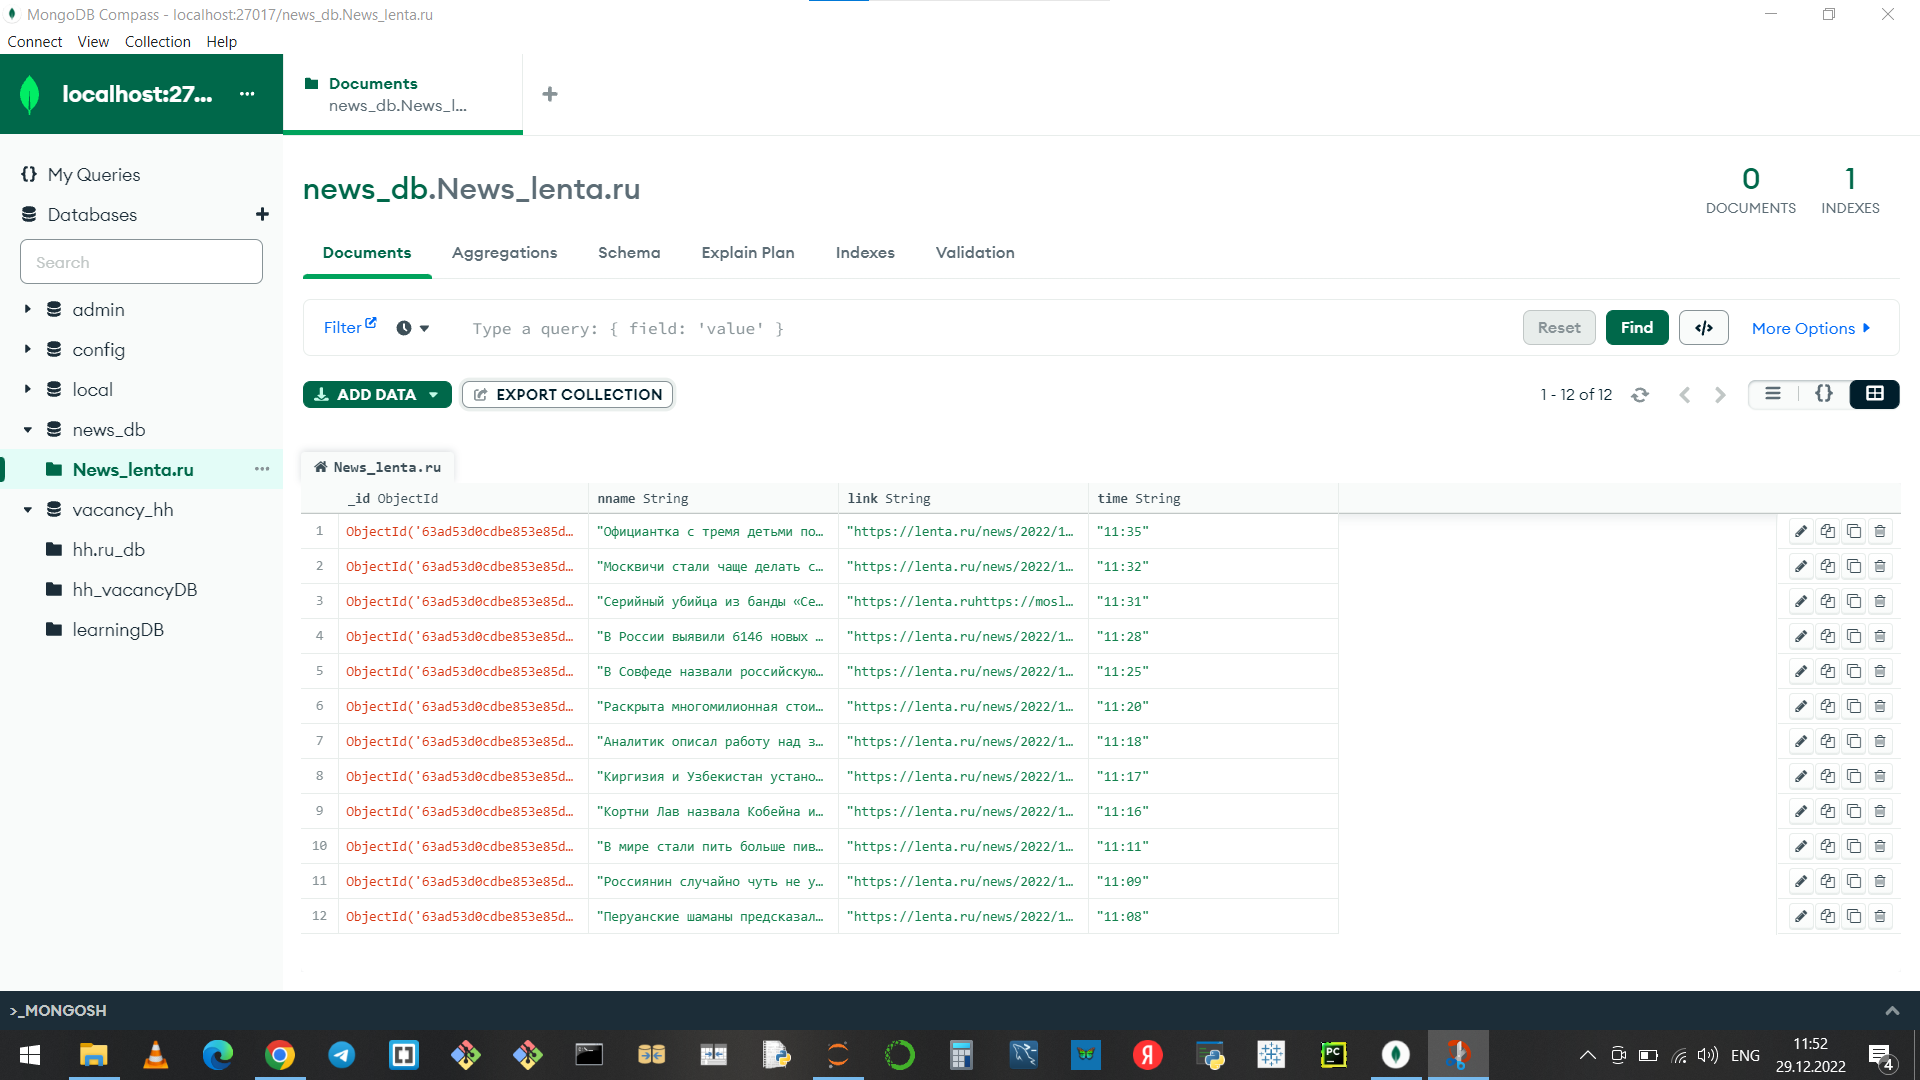